# Visualize Agent Result (Img: save_to_path)

total 7 messages

message 1 - SYSTEM
content: You are a helpful assistant.

# Tools

You may call one or more functions to assist with the user query.

You are provided with function signatures within <tools></tools> XML tags:
<tools>
{"type": "function", "function": {"name": "image_zoom_in_tool", "description": "Zoom in on a region of an image using relative coordinates in [0, 1000]. For example, to zoom in on the center 50%, use [250, 250, 750, 750].", "parameters": {"type": "object", "properties": {"image": {"type": "string", "description": "The image to zoom in on (e.g., `original_image`, `observation_1`, `observation_2`, ...)."}, "bbox_2d": {"type": "array", "description": "Bounding box [x1, y1, x2, y2] with values between 0 and 1000, where (x1, y1) = top-left, (x2, y2) = bottom-right."}}, "required": ["image", "bbox_2d"]}}}
</tools>

For each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:
<tool_call>
{"name": <functio

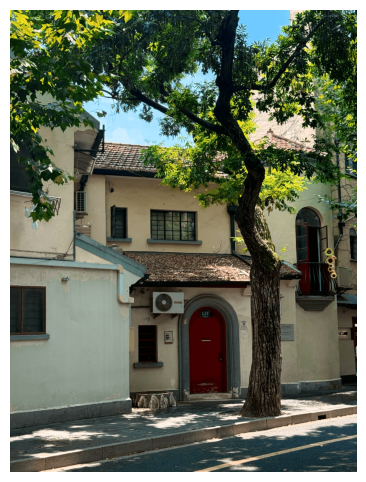

text content: Your role is that of a research assistant specializing in visual information. Answer questions about images by looking at them closely and then using research tools (Only the `crop_image` tool is available). Please follow this structured thinking process and show your work.

Start an iterative loop for each question:

- **First, look closely:** Begin with a detailed description of the image, paying attention to the user's question. List what you can tell just by looking, and what you'll need to look up.
- **Next, find information:** Use a tool to research the things you need to find out.
- **Then, review the findings:** Carefully analyze what the tool tells you and decide on your next action.

Continue this loop until your research is complete.

To finish, bring everything together in a clear, synthesized answer that fully responds to the user's question.

---
Now, here is the question: Where was the picture taken?


message 3 - ASSISTANT
content: **First, look closely:**

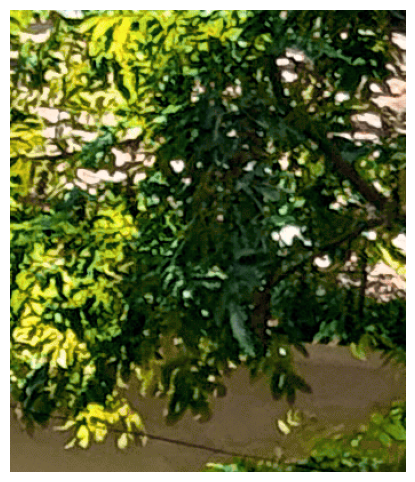

text content: This is the zoom-in image `observation_1`(zoomed in on the image original_image) after your tool call.
Continue your reasoning process within `<think>...</think>`. If needed, you can continue to call available tools within `<tool_call>...</tool_call>`. If your final response to the original question is confirmed, put your final answer or judgment within `<answer>...</answer>`.

message 5 - ASSISTANT
content: I see some foliage from trees above; however, there doesn't seem to be much useful contextual information like street names or other identifying markers in this particular cropped section. Let me try focusing on areas near the entrance of the house since they often contain relevant details such as plaques or address numbers which can help locate the place.

Let me now focus my search specifically on the area surrounding the number '129' on the front door, as well as any potential signboards or inscriptions nearby.

<tool_call>
{"name": "image_zoom_in_tool", "arguments

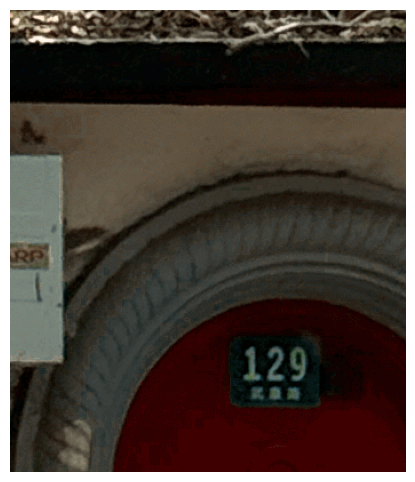

text content: This is the zoom-in image `observation_2`(zoomed in on the image original_image) after your tool call.
Continue your reasoning process within `<think>...</think>`. If needed, you can continue to call available tools within `<tool_call>...</tool_call>`. If your final response to the original question is confirmed, put your final answer or judgment within `<answer>...</answer>`.

message 7 - ASSISTANT
content: Looking closer at the zoomed-in view reveals not only the number "129" but also Chinese characters directly below it. These characters appear to read "武康路," which translates to Wukang Road—a famous historical avenue in Shanghai renowned for its European-style architecture and cultural significance. 

Given these clues—the architectural style, the presence of Chinese script indicating "Wukang Road," and the overall ambiance—it strongly indicates that the photograph was likely captured along Wukang Road in Shanghai, China.

<answer>The photo appears to have been taken o

In [9]:
import json
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
import os

img_root = "./result_images/test_agent_image_zoom_in"
# load data 
with open('./result.json', 'r', encoding='utf-8') as f:
    messages = json.load(f)

print(f"total {len(messages)} messages\n")

# iterate over all messages
for i, message in enumerate(messages):
    role = message.get('role', 'unknown')
    content = message.get('content', '')
    
    print(f"{'='*60}")
    print(f"message {i+1} - {role.upper()}")
    print(f"{'='*60}")
    
    # handle images
    if isinstance(content, list):
        for item in content:
            if isinstance(item, dict) and item.get('type') == 'image_url':
                url = item.get('image_url', {}).get('url', '')
                if url.startswith('data:image'):
                    print(f"found image (base64): {url[:100]}...")
                    # decode and display image
                    try:
                        base64_data = url.split(',')[1]
                        image_data = base64.b64decode(base64_data)
                        image = Image.open(BytesIO(image_data))
                        plt.figure(figsize=(8, 6))
                        plt.imshow(image)
                        plt.axis('off')
                        # plt.title(f"image - {image.size[0]}x{image.size[1]} pixels")
                        plt.show()
                    except Exception as e:
                        print(f"image decoding failed: {e}")
                else:
                    try:
                        img_path = os.path.join(img_root, url)
                        image = Image.open(img_path)
                        plt.figure(figsize=(8, 6))
                        plt.imshow(image)
                        plt.axis('off')
                        plt.show()
                    except Exception as e:
                        print(f"image decoding failed: {e}")
            elif isinstance(item, dict) and item.get('type') == 'text':
                text = item.get('text', '')
                if text.strip():
                    print(f"text content: {text}")
    else:
        # pure text content
        if content.strip():
            print(f"content: {str(content)}")
    
    print()

print(f"{'='*60}")
print("statistics information")
print(f"{'='*60}")
role_counts = {}
for msg in messages:
    role = msg.get('role', 'unknown')
    role_counts[role] = role_counts.get(role, 0) + 1

for role, count in role_counts.items():
    print(f"{role}: {count} messages")

# Visualize Agent Result (Img: base64)

In [ ]:
import json
import base64
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

# load data 
with open('./result.json', 'r', encoding='utf-8') as f:
    messages = json.load(f)

print(f"total {len(messages)} messages\n")

# iterate over all messages
for i, message in enumerate(messages):
    role = message.get('role', 'unknown')
    content = message.get('content', '')
    
    print(f"{'='*60}")
    print(f"message {i+1} - {role.upper()}")
    print(f"{'='*60}")
    
    # handle images
    if isinstance(content, list):
        for item in content:
            if isinstance(item, dict) and item.get('type') == 'image_url':
                url = item.get('image_url', {}).get('url', '')
                if url.startswith('data:image'):
                    print(f"found image (base64): {url[:100]}...")
                    # decode and display image
                    try:
                        base64_data = url.split(',')[1]
                        image_data = base64.b64decode(base64_data)
                        image = Image.open(BytesIO(image_data))
                        plt.figure(figsize=(8, 6))
                        plt.imshow(image)
                        plt.axis('off')
                        # plt.title(f"image - {image.size[0]}x{image.size[1]} pixels")
                        plt.show()
                    except Exception as e:
                        print(f"image decoding failed: {e}")
            elif isinstance(item, dict) and item.get('type') == 'text':
                text = item.get('text', '')
                if text.strip():
                    print(f"text content: {text}")
    else:
        # pure text content
        if content.strip():
            print(f"content: {str(content)}")
    
    print()

print(f"{'='*60}")
print("statistics information")
print(f"{'='*60}")
role_counts = {}
for msg in messages:
    role = msg.get('role', 'unknown')
    role_counts[role] = role_counts.get(role, 0) + 1

for role, count in role_counts.items():
    print(f"{role}: {count} messages")


In [1]:
FIXED_COT_PROMPT = (
    "**Important Requirement:**\n"
    "The given image is `original_image`. You must output your reasoning inside `<think>...</think>`. "
    "After reasoning, either output the final answer within `<answer>...</answer>` or call a tool within `<tool_call>...</tool_call>`. "
    "You may call tools multiple times across turns to assist with judgment or verification, **but only one tool per turn**. "
    "If a tool call fails, you can retry or stop and give your final answer. "
    "Once no more tool calls are needed, provide your final answer or judgment within `<answer>...</answer>`."
)

print(repr(FIXED_COT_PROMPT))

'**Important Requirement:**\nThe given image is `original_image`. You must output your reasoning inside `<think>...</think>`. After reasoning, either output the final answer within `<answer>...</answer>` or call a tool within `<tool_call>...</tool_call>`. You may call tools multiple times across turns to assist with judgment or verification, **but only one tool per turn**. If a tool call fails, you can retry or stop and give your final answer. Once no more tool calls are needed, provide your final answer or judgment within `<answer>...</answer>`.'


In [ ]:
import json

json_path = "chat_template.json"
data = json.load(open(json_path, 'r', encoding='utf-8'))
file_jinja = "qwen3_vl_235.jinja"
# print(file_json["chat_template"])
with open(file_jinja, 'w', encoding='utf-8') as f:
    f.write(data["chat_template"])